<a href="https://colab.research.google.com/github/carmsanchezs/DSFem_titanic_project/blob/main/titanic_short_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic**
## Reto: ¿Cuál es la supervivencia por genéro, clase y embarque? Acompaña tu respuesta con un gráfico.
[reto y dataset en Kaggle](https://www.kaggle.com/c/titanic/data)

In [33]:
# importando librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# cargando archivo
titanic = pd.read_csv('train.csv')
titanic.shape

(891, 12)

In [35]:
# analizando los campos y tipos de datos
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
# filtrando sólo los sobrevivientes
survivors = titanic.query('Survived == 1')
survivors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [37]:
# haciendo conteo de los sobrevivientes por género "Sex", sin nulos
survivors_gen = survivors['Sex'].value_counts()
survivors_gen

female    233
male      109
Name: Sex, dtype: int64

In [38]:
# haciendo conteo de los sobrevivientes por clase "Pclass", sin nulos
survivors_class = survivors['Pclass'].value_counts()
survivors_class

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [39]:
# haciendo conteo de los sobrevivientes por embarque "Embarked", sin nulos
survivors_emb = survivors['Embarked'].value_counts() 
survivors_emb

S    217
C     93
Q     30
Name: Embarked, dtype: int64

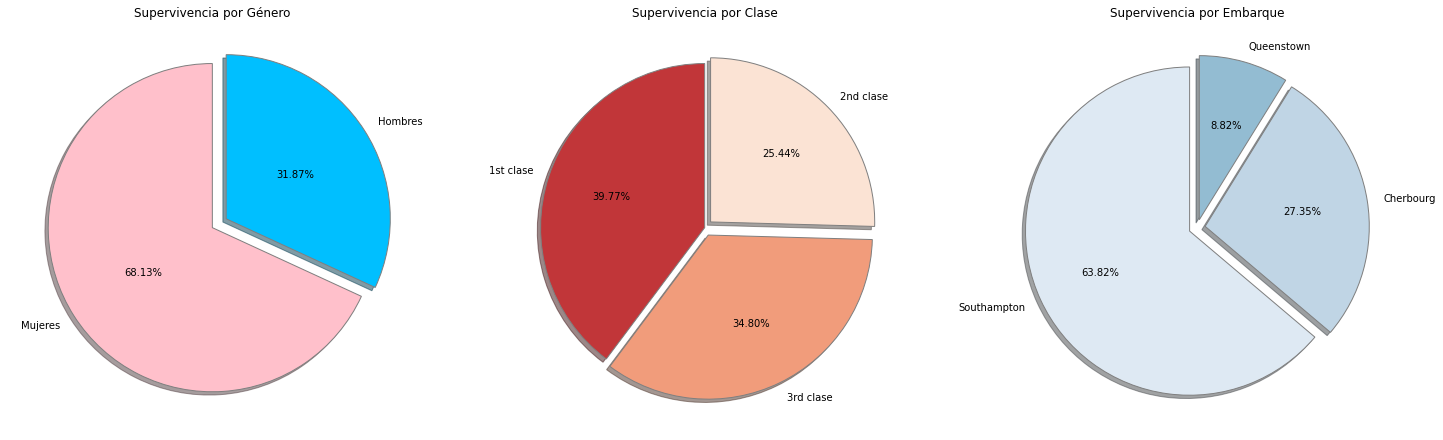

In [40]:
# Graficando
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=[25,10])

ax[0].pie(x=survivors_gen, 
            startangle=90,
            colors=["#FFC0CB", "#00BFFF"],
            wedgeprops={'edgecolor': 'gray'}, 
            autopct='%.2f%%', 
            pctdistance=0.5,
            labels = ["Mujeres","Hombres"],
            explode = (0, 0.1),
            shadow=True)
ax[0].set_title("Supervivencia por Género")


ax[1].pie(x=survivors_class, 
            startangle=90,
            colors=["#C13639", "#F19C7B", "#FBE3D4"],
            wedgeprops={'edgecolor': 'gray'}, 
            labels = ["1st clase","3rd clase","2nd clase"],
            autopct='%.2f%%', 
            explode = (0, 0.05, 0.05),
            shadow=True)
ax[1].set_title("Supervivencia por Clase")

ax[2].pie(x=survivors_emb, 
            startangle=90,
            colors=["#DEE9F3", "#C0D5E5", "#93BCD2"],
            wedgeprops={'edgecolor': 'gray'},
            labels = ['Southampton', 'Cherbourg', 'Queenstown'],
            autopct='%.2f%%', 
            explode = (0.05, 0.05,0.05),
            shadow=True)
ax[2].set_title("Supervivencia por Embarque")

plt.show()